In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale,minmax_scale,robust_scale
#%matplotlib inline background 그래프 실행 및 결과 확인
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
#예측
from sklearn.tree import export_graphviz 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#모델 성능 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#confusion matrix
from sklearn.metrics import confusion_matrix

#Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
#주성분 분석
from sklearn.decomposition import PCA
#회귀분석
import statsmodels.api as sm
#RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
#MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
#분류 : KNN
from sklearn.neighbors import KNeighborsClassifier
#로지스틱 회귀
from statsmodels.api import Logit
#데이터 분항
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import os
import graphviz

from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


In [9]:
df=pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/직무능력평가.csv")
df.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [10]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled[:5]

array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [11]:
df_raw_y = df_scaled[:,0]
df_raw_x = df_scaled[:,1::]

In [12]:
# 군집간의 연결 ward  거리 계산 : euclidean
z_ward = linkage(df_raw_x,method = 'ward',metric ='euclidean' )
z_avg = linkage(df_raw_x,method = 'average',metric ='euclidean' )
z_mink = linkage(df_raw_x,method = 'average',metric ='minkowski' )

In [26]:
z_ward

array([[14.        , 26.        ,  0.52156235,  2.        ],
       [ 3.        , 27.        ,  0.65700712,  2.        ],
       [ 9.        , 22.        ,  0.84734214,  2.        ],
       [16.        , 28.        ,  1.13863458,  2.        ],
       [ 6.        ,  7.        ,  1.17063718,  2.        ],
       [ 1.        , 21.        ,  1.22298201,  2.        ],
       [11.        , 32.        ,  1.31728974,  3.        ],
       [ 2.        ,  4.        ,  1.33423955,  2.        ],
       [24.        , 36.        ,  1.47235046,  4.        ],
       [30.        , 37.        ,  1.65014418,  4.        ],
       [18.        , 35.        ,  1.78970024,  3.        ],
       [29.        , 34.        ,  1.8539993 ,  3.        ],
       [10.        , 12.        ,  1.88477465,  2.        ],
       [31.        , 38.        ,  1.94570646,  6.        ],
       [25.        , 33.        ,  2.11914806,  3.        ],
       [ 5.        , 42.        ,  2.16582648,  3.        ],
       [17.        , 19.

Text(0, 0.5, 'sample index')

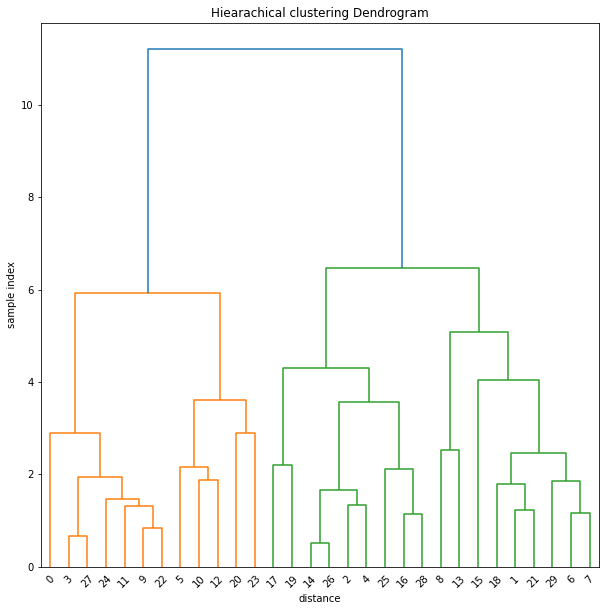

In [27]:
plt.figure(figsize=(10,10))
ax=plt.subplot(111)
dendrogram(z_ward,leaf_font_size = 10 , orientation = 'top')
plt.title("Hiearachical clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")


Text(0, 0.5, 'sample index')

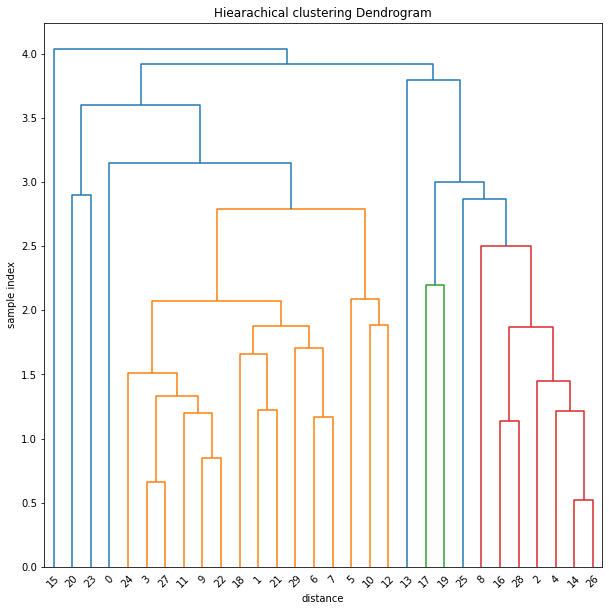

In [28]:
plt.figure(figsize=(10,10))
ax=plt.subplot(111)
dendrogram(z_avg,leaf_font_size = 10 , orientation = 'top')
plt.title("Hiearachical clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")


Text(0, 0.5, 'sample index')

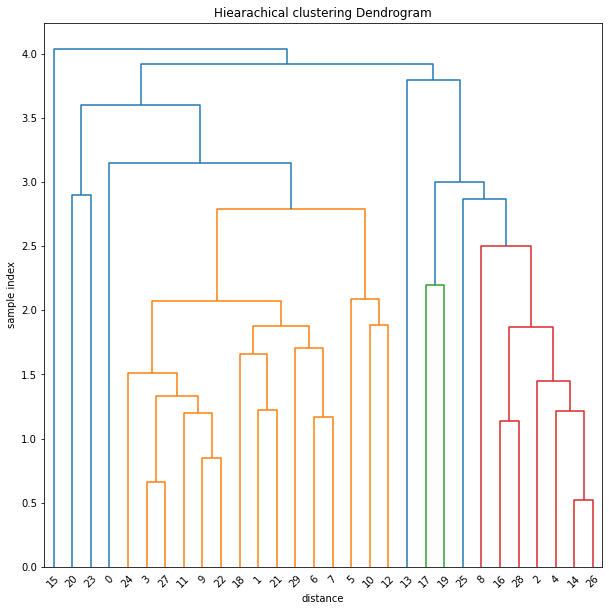

In [29]:
plt.figure(figsize=(10,10))
ax=plt.subplot(111)
dendrogram(z_mink,leaf_font_size = 10 , orientation = 'top')
plt.title("Hiearachical clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")


In [38]:
# 거리 기반으로만 판단하기 좀 어려워서 maxclust 라고 t 의 값만큼 군집을 형성해라 라는 뜻
cluster_hierarchical = fcluster(Z=z_ward, t=6 , criterion = 'maxclust')
df["ClusterHierarchical"]=cluster_hierarchical
df.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,6
2,71,70,68,69,76,86,48,4
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,4


In [39]:
ds_summary_hc=df.groupby('ClusterHierarchical').agg(["min","mean","max"])
level0=ds_summary_hc.columns.get_level_values(0)
level1=ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns=level0 + "_"+level1
ds_summary_hc.reset_index(inplace=True)
ds_summary_hc.round(3)

,ClusterHierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,57.500,65,58,59.000,60,65,66.500,68,...,75,55,59.500,64,78,79.000,80,52,56.000,60
3,4,66,76.000,85,70,78.143,85,54,62.429,71,...,74,71,78.571,88,74,79.000,86,46,54.286,72
4,5,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
5,6,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47


In [21]:
n_iter_cluster = 15
cluster_range= [i+1 for i in range(n_iter_cluster)]
clus_error=[]
for v_n_clus in cluster_range:
    clus= KMeans(v_n_clus)
    clus.fit(df_raw_x)
    
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({"NumberofCluster":cluster_range,"Error":clus_error})
ds_error

,NumberofCluster,Error
0,1,180.000000
1,2,114.082503
2,3,94.686983
3,4,78.828508
4,5,66.483848
5,6,57.960779
6,7,51.187713
7,8,44.409671
8,9,37.889941
9,10,32.526020


Text(0, 0.5, 'Sum of squared distance')

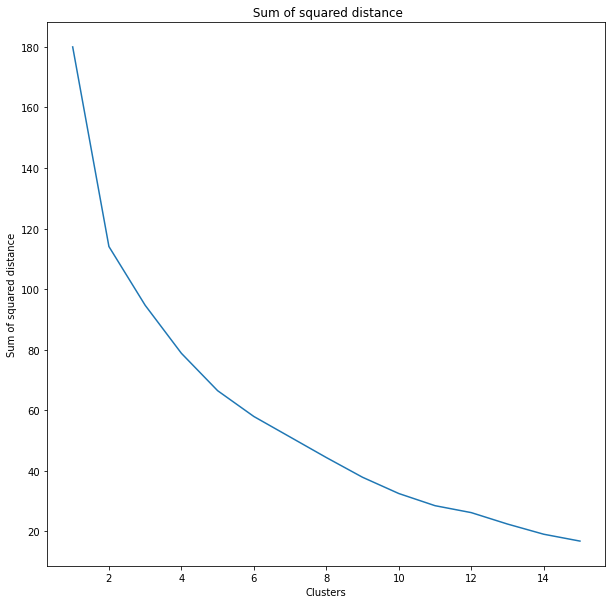

In [24]:
plt.figure(figsize=(10,10))
plt.plot(ds_error["NumberofCluster"],ds_error["Error"])
plt.title(" Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

In [25]:
clus=KMeans(5)
clus.fit(df_raw_x)
cluster_kmeans=[i+1 for i in clus.labels_]
df["ClusterKmeans"]